## Daily Code Workout Day 4(220428)
1. Monty Hall Problem
2. Covid Simulation
3. Covid Data Analysis(<- Here!)

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data

#### 00. Packages Used

In [11]:
import pandas as pd
import numpy as np
import random

In [17]:
org_df = pd.read_json("./owid-covid-data.json", orient="records")

pandas.core.frame.DataFrame

In [38]:
c_dict = dict(zip(['USA', 'CHN', 'FRA', "DEU"], 
                  [pd.DataFrame(org_df[org_df.index=='data'][x][0])[["date",'new_cases', 'new_deaths']] 
                   for x in ['USA', 'CHN', 'FRA', "DEU"]]))

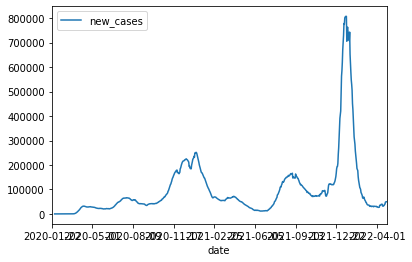

In [46]:
pic_df = c_dict['USA'].copy().set_index("date").interpolate()
pic_df = pic_df.rolling(7).mean()
pic_df['new_cases'].plot()

#### 01. Max Min Point Location

In [133]:
def mm_loc(df_o, col = 'data', find_min = True, check_n = 7):
    df = df_o.copy().sort_index()
    if col not in list(df):
        col = list(df)[0]
    if find_min:
        df['bef'] = df[col].rolling(check_n).min()
    else:
        df['bef'] = df[col].rolling(check_n).max()
    df = df.sort_index(ascending = False)
    df['check'] = df[col].rolling(check_n).min()
    if find_min:
        df['aft'] = df[col].rolling(check_n).min()
    else:
        df['aft'] = df[col].rolling(check_n).max()
    df = df.sort_index()
    return(df[(df['bef']==df['aft']) & (df['bef']==df[col]) ][[col]])

#### 02. Inflection Point Detection(working)

In [75]:
from scipy.signal import savgol_filter

In [120]:
pic_df = c_dict['USA'].copy().set_index("date").interpolate().head(int(c_dict['USA'].shape[0]/2))
pic_df = pic_df.rolling(7).mean()
pic_df['first'] = pic_df['new_cases'].diff(1)
pic_df = pic_df.dropna()

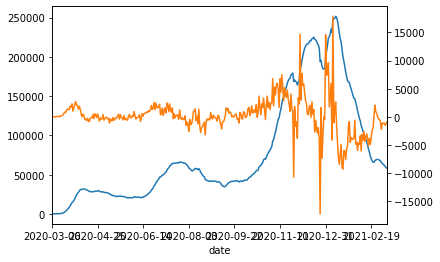

In [121]:
pic_df['new_cases'].plot()
pic_df['first'].plot(secondary_y = True)

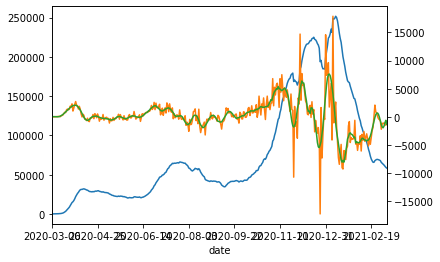

In [132]:
pic_df['fr_smth'] = pd.Series(savgol_filter(pic_df['first'], 51, 10), index = pic_df.index)
pic_df['new_cases'].plot()
pic_df['first'].plot(secondary_y = True)
pic_df['fr_smth'].plot(secondary_y = True)

## Daily Code Workout Day 5(220429)
1. Monty Hall Problem
2. Covid Simulation
3. Covid Data Analysis(<- Here!)